In [2]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

raw_data_dir = Path("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/data/raw")

mESC_data_dir = raw_data_dir / "mESC_lower_max_peak_dist"
macrophage_data_dir = raw_data_dir / "macrophage"
k562_data_dir = raw_data_dir / "K562"


## mESC

In [3]:
unique_peaks = set()
unique_genes = set()
for item in mESC_data_dir.iterdir():
    if item.is_dir():
        print(f"mESC subdir: {item.name}")
        for file in item.iterdir():
            if file.name.endswith("scATAC_seq_raw.parquet"):
                print(f"  - File: {file.name}")
                parquet_file = pq.ParquetFile(file)
                unique_peaks.update(parquet_file.schema.names)
            if file.name.endswith("scRNA_seq_raw.parquet"):
                print(f"  - File: {file.name}")
                parquet_file = pq.ParquetFile(file)
                unique_genes.update(parquet_file.schema.names)

print()
print(f"Total unique genes in mESC RNA-seq data: {len(unique_genes)}")
print(f"Total unique peaks in mESC ATAC-seq data: {len(unique_peaks)}")

mESC subdir: E8.0_rep2
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E7.5_rep1
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E8.75_rep2
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E8.5_rep1
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E8.0_rep1
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E8.5_rep2
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E7.75_rep1
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet
mESC subdir: E7.5_rep2
  - File: scRNA_seq_raw.parquet
  - File: scATAC_seq_raw.parquet

Total unique genes in mESC RNA-seq data: 32286
Total unique peaks in mESC ATAC-seq data: 192249


## Macrophage

In [4]:
unique_peaks = set()
unique_genes = set()
unique_cells = set()
for item in macrophage_data_dir.iterdir():
    if item.is_dir():
        print(f"macrophage subdir: {item.name}")
        for file in item.iterdir():
            if file.name.endswith(f"matched_filtered_ATAC_rawcounts_{item.name}.csv"):
                print(f"  - File: {file.name}")
                df = pd.read_csv(file)
                unique_peaks.update(df.index.tolist())
                unique_cells.update(df.columns.tolist())
            if file.name.endswith(f"matched_filtered_RNA_rawcounts_{item.name}.csv"):
                print(f"  - File: {file.name}")
                df = pd.read_csv(file)
                unique_genes.update(df.index.tolist())
                unique_cells.update(df.columns.tolist())

print()
print(f"Total unique genes in macrophage RNA-seq data: {len(unique_genes)}")
print(f"Total unique peaks in macrophage ATAC-seq data: {len(unique_peaks)}")
print(f"Total unique cells in macrophage ATAC-seq data: {len(unique_cells)}")

macrophage subdir: buffer_3
  - File: matched_filtered_ATAC_rawcounts_buffer_3.csv
  - File: matched_filtered_RNA_rawcounts_buffer_3.csv
macrophage subdir: buffer_2
  - File: matched_filtered_RNA_rawcounts_buffer_2.csv
  - File: matched_filtered_ATAC_rawcounts_buffer_2.csv
macrophage subdir: buffer_1
  - File: matched_filtered_ATAC_rawcounts_buffer_1.csv
  - File: matched_filtered_RNA_rawcounts_buffer_1.csv
macrophage subdir: buffer_4
  - File: matched_filtered_ATAC_rawcounts_buffer_4.csv
  - File: matched_filtered_RNA_rawcounts_buffer_4.csv

Total unique genes in macrophage RNA-seq data: 10063
Total unique peaks in macrophage ATAC-seq data: 271348
Total unique cells in macrophage ATAC-seq data: 1635


## K562

In [5]:
unique_peaks = set()
unique_genes = set()
unique_cells = set()
for item in k562_data_dir.iterdir():
    if item.is_dir():
        print(f"K562 subdir: {item.name}")
        for file in item.iterdir():
            if file.name.endswith(f"K562_human_filtered_ATAC.csv"):
                print(f"  - File: {file.name}")
                df = pd.read_csv(file)
                unique_peaks.update(df.index.tolist())
                unique_cells.update(df.columns.tolist())
            if file.name.endswith(f"K562_human_filtered_RNA.csv"):
                print(f"  - File: {file.name}")
                df = pd.read_csv(file)
                unique_genes.update(df.index.tolist())
                unique_cells.update(df.columns.tolist())

print()
print(f"Total unique cells in K562 ATAC-seq data: {len(unique_cells)}")
print(f"Total unique genes in K562 RNA-seq data: {len(unique_genes)}")
print(f"Total unique peaks in K562 ATAC-seq data: {len(unique_peaks)}")


K562 subdir: sample_1
  - File: K562_human_filtered_RNA.csv
  - File: K562_human_filtered_ATAC.csv

Total unique cells in K562 ATAC-seq data: 412
Total unique genes in K562 RNA-seq data: 10012
Total unique peaks in K562 ATAC-seq data: 177439


## Best Experiment Results

2 Hops, 40k distance scale factor, higher max peak distance

In [6]:
mESC_exp_name = "mESC_slow_decay_long_range_two_hop"
macrophage_exp_name = "Macrophage_two_hops_slow_decay_long_range_small_batch"
k562_exp_name = "K562_two_hops_slow_decay_long_range"

experiment_dir = Path(f"/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments")

def open_auc_data_files(exp_name: str, model_num: int = 1):
    exp_path = experiment_dir / exp_name / "chr19" / f"model_training_{model_num:03d}"
    per_tf_df = pd.read_csv(exp_path / "per_tf_auroc_auprc_detailed.csv", header=0, index_col=None)
    per_gt_df = pd.read_csv(exp_path / "per_gt_method_aucs_detailed.csv", header=0, index_col=None)
    return per_tf_df, per_gt_df

k562_per_tf_df, k562_per_gt_df = open_auc_data_files(k562_exp_name)
mESC_per_tf_df, mESC_per_gt_df = open_auc_data_files(mESC_exp_name)
macrophage_per_tf_df, macrophage_per_gt_df = open_auc_data_files(macrophage_exp_name)



In [7]:
def calculate_mean_auroc_for_method(per_gt_df: pd.DataFrame, method_name: str) -> float:
    return per_gt_df[per_gt_df["name"] == method_name]["auroc"].mean()

def calculate_mean_per_tf_auroc(per_tf_df: pd.DataFrame, method_name: str) -> float:
    # Select only rows for the specified method
    per_tf_mean_by_method = per_tf_df[per_tf_df["method"] == method_name]
    
    # Calculate the mean AUROC per ground truth for all TFs
    per_tf_mean_score = per_tf_mean_by_method.groupby("tf")["auroc"].mean().reset_index()
    
    # Calculate the mean AUROC across all ground truths
    per_tf_mean_by_gt = per_tf_mean_score["auroc"].mean()
    
    return per_tf_mean_by_gt

method_list = ["Gradient Attribution", "TF Knockout"]
for method in method_list:
    k562_mean_per_tf_auroc = calculate_mean_per_tf_auroc(k562_per_tf_df, method)
    macrophage_mean_per_tf_auroc = calculate_mean_per_tf_auroc(macrophage_per_tf_df, method)
    mESC_mean_per_tf_auroc = calculate_mean_per_tf_auroc(mESC_per_tf_df, method)
    
    k562_mean_auroc = calculate_mean_auroc_for_method(k562_per_gt_df, method)
    macrophage_mean_auroc = calculate_mean_auroc_for_method(macrophage_per_gt_df, method)
    mESC_mean_auroc = calculate_mean_auroc_for_method(mESC_per_gt_df, method)
    
    print(method)
    print(f"  - Mean AUROC:")
    print(f"    - mESC: {mESC_mean_auroc:.3f}")
    print(f"    - Macrophage: {macrophage_mean_auroc:.3f}")
    print(f"    - K562: {k562_mean_auroc:.3f}")
    print() 
    
    print(f"  - Mean per-TF AUROC:")
    print(f"    - mESC: {mESC_mean_per_tf_auroc:.3f}")
    print(f"    - Macrophage: {macrophage_mean_per_tf_auroc:.3f}")
    print(f"    - K562: {k562_mean_per_tf_auroc:.3f}")
    print()


Gradient Attribution
  - Mean AUROC:
    - mESC: 0.540
    - Macrophage: 0.551
    - K562: 0.538

  - Mean per-TF AUROC:
    - mESC: 0.581
    - Macrophage: 0.563
    - K562: 0.564

TF Knockout
  - Mean AUROC:
    - mESC: 0.532
    - Macrophage: 0.552
    - K562: 0.525

  - Mean per-TF AUROC:
    - mESC: 0.562
    - Macrophage: 0.557
    - K562: 0.556



In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_all_results_auroc_boxplot(df, per_tf=False):
    # 1. Order methods by mean AUROC (highest → lowest)
    method_order = (
        df.groupby("name")["auroc"]
        .mean()
        .sort_values(ascending=False)
        .index
    )

    # 2. Prepare data in that order
    data = [df.loc[df["name"] == m, "auroc"].values for m in method_order]

    feature_list = [
        "Gradient Attribution",
        "TF Knockout",
        "TF-TG Embedding Similarity",
        "Shortcut Attention"
    ]
    my_color = "#4195df"
    other_color = "#747474"

    fig, ax = plt.subplots(figsize=(10, 6))

    # Baseline random line
    ax.axhline(y=0.5, color="#2D2D2D", linestyle='--', linewidth=1)

    # --- Boxplot (existing styling) ---
    bp = ax.boxplot(
        data,
        tick_labels=method_order,
        patch_artist=True,
        showfliers=False
    )

    # Color boxes: light blue for your methods, grey for others
    for box, method in zip(bp["boxes"], method_order):
        if method in feature_list:
            box.set_facecolor(my_color)
        else:
            box.set_facecolor(other_color)

    # Medians in black
    for median in bp["medians"]:
        median.set_color("black")

    # --- NEW: overlay jittered points for each method ---
    for i, method in enumerate(method_order, start=1):
        y = df.loc[df["name"] == method, "auroc"].values
        if len(y) == 0:
            continue

        # Small horizontal jitter around the box center (position i)
        x = np.random.normal(loc=i, scale=0.06, size=len(y))

        # Match point color to box color
        point_color = my_color if method in feature_list else other_color

        ax.scatter(
            x, y,
            color=point_color,
            alpha=0.7,
            s=18,
            edgecolor="k",
            linewidth=0.3,
            zorder=3,
        )
        
        mean_val = y.mean()
        ax.scatter(
            i, mean_val,
            color="white",
            edgecolor="k",
            s=30,
            zorder=4,
        )

    ax.set_xlabel("Method")
    ax.set_ylabel("AUROC across ground truths")
    if per_tf == True:
        ax.set_title("per-TF AUROC Scores per method")
        ax.set_ylim((0.2, 0.8))
    else:
        ax.set_title("AUROC Scores per method")
        ax.set_ylim((0.2, 0.8))

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    
    return fig

In [9]:
def per_tf_method_one(per_tf_metrics: pd.DataFrame):
    # ===== Method 1: Mean of Each TF per Ground Truth =====
    method_gt_avg = (
        per_tf_metrics
        .groupby(['method', 'gt_name'], as_index=False)
        .agg(
            auroc=('auroc', 'mean'),
            auprc=('auprc', 'mean'),
            n_tfs=('tf', 'nunique'),
        )
    )

    method_gt_avg.rename(columns={'method': 'name'}, inplace=True)

    # Plot the boxplots and save data
    per_tf_mean_auroc_boxplot = plot_all_results_auroc_boxplot(method_gt_avg, per_tf=True)
    per_tf_mean_auroc_boxplot.show()

def per_tf_method_two(per_tf_metrics: pd.DataFrame):
    per_tf_for_plot = per_tf_metrics[['method', 'auroc', 'auprc']].copy()
    per_tf_for_plot = per_tf_for_plot.rename(columns={'method': 'name'})
    

    # Plot the boxplots and save data like above methods
    per_tf_mean_auroc_boxplot = plot_all_results_auroc_boxplot(per_tf_for_plot, per_tf=True)
    per_tf_mean_auroc_boxplot.show()

def per_tf_method_three(per_tf_metrics: pd.DataFrame):
    # ===== Method 3: Calculate the Mean TF AUROC/AUPRC Across All GTs =====
    per_tf_mean_across_gt = (
        per_tf_metrics
        .groupby(['method', 'tf'], as_index=False)
        .agg(
            auroc=('auroc', 'mean'),
            auprc=('auprc', 'mean'),
            n_gt=('gt_name', 'nunique'),
        )
    )

    per_tf_mean_across_gt.rename(columns={'method': 'name'}, inplace=True)

        #Plot the boxplots and save data like above methods
    per_tf_mean_auroc_boxplot = plot_all_results_auroc_boxplot(per_tf_mean_across_gt, per_tf=True)
    per_tf_mean_auroc_boxplot.show()

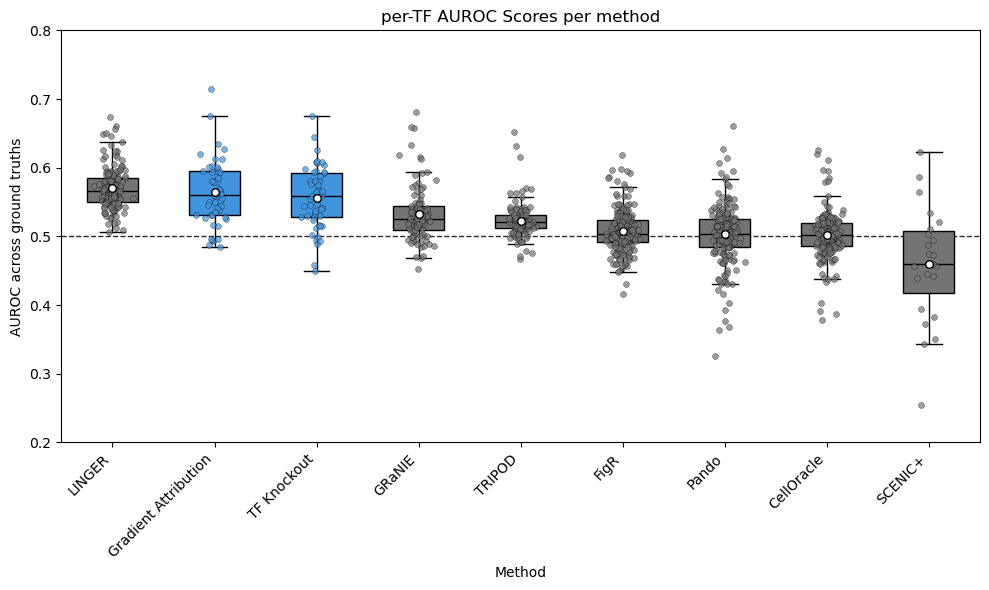

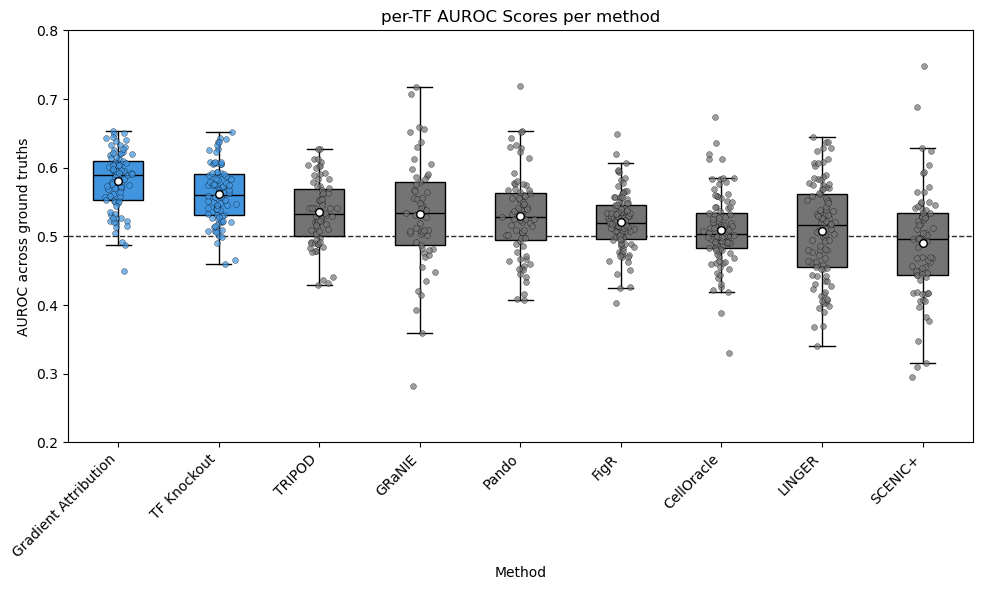

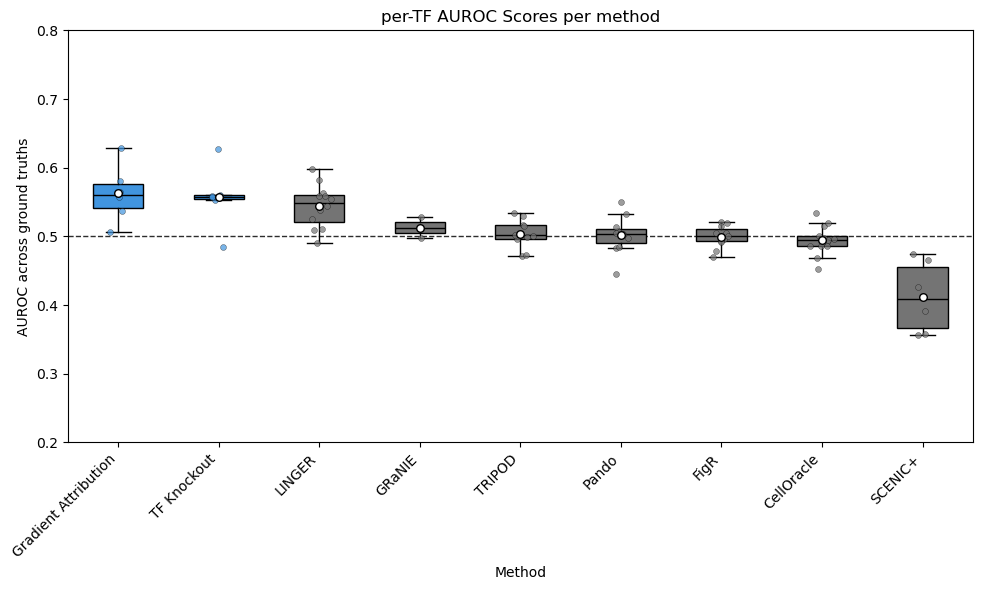

In [10]:
# Calculate and plot per-TF method rankings using different approaches
per_tf_method_three(k562_per_tf_df)
per_tf_method_three(mESC_per_tf_df)
per_tf_method_three(macrophage_per_tf_df)

## Testing K562 Stability refactored model results

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stability_boxplots_by_experiment(df, per_tf=True, method_name="Gradient Attribution"):
    # Filter to GA only
    d = df[df["method"] == method_name].copy()
    if d.empty:
        raise ValueError(f"No rows found for method '{method_name}'. Available methods: {df['method'].unique()}")

    # Order experiments as they appear (or sort)
    exp_order = list(dict.fromkeys(d["experiment"].tolist()))
    data = [d.loc[d["experiment"] == e, "auroc"].dropna().to_numpy() for e in exp_order]

    fig, ax = plt.subplots(figsize=(6.5, 5))
    ax.axhline(0.5, color="#2D2D2D", linestyle="--", linewidth=1)

    bp = ax.boxplot(
        data,
        tick_labels=exp_order,
        patch_artist=True,
        showfliers=False
    )

    # style
    for box in bp["boxes"]:
        box.set_facecolor("#4195df")
    for med in bp["medians"]:
        med.set_color("black")

    # mean markers
    for i, e in enumerate(exp_order, start=1):
        y = d.loc[d["experiment"] == e, "auroc"].dropna().to_numpy()
        if y.size == 0:
            continue

        ax.scatter(i, y.mean(), color="white", edgecolor="k",
                   s=30, zorder=4)

    ax.set_xlabel("Stability experiment")
    
    if per_tf == True:
        ax.set_ylabel("per-TF AUROC")
        ax.set_title(f"{method_name} per-TF AUROC by stability experiment")
    else:
        ax.set_ylabel("AUROC")
        ax.set_title(f"{method_name} AUROC by stability experiment")

    ax.set_ylim((0.2, 0.8) if per_tf else (0.2, 0.8))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    return fig


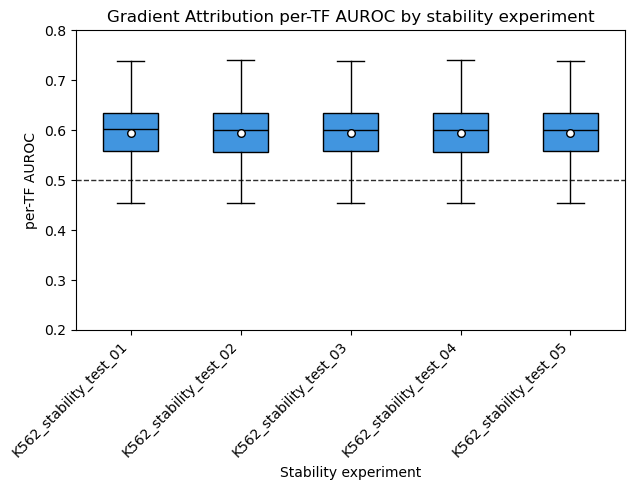

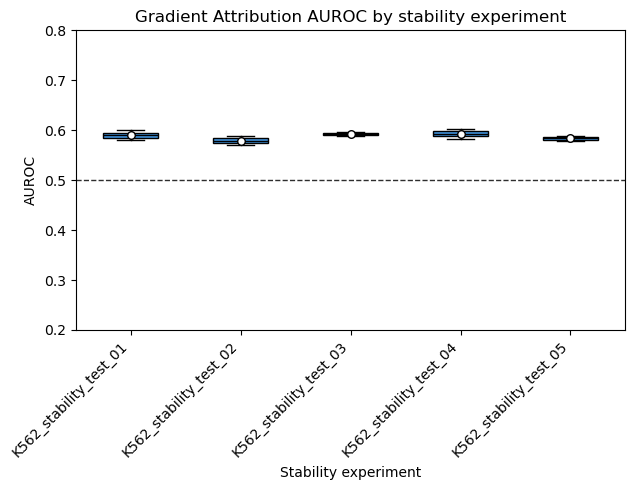

In [12]:
from sqlalchemy import all_


stability_experiments = [
    "K562_stability_test_01",
    "K562_stability_test_02",
    "K562_stability_test_03",
    "K562_stability_test_04",
    "K562_stability_test_05",
]

for stability_exp in stability_experiments:
    stability_per_tf_df, stability_per_gt_df = open_auc_data_files(stability_exp)
    
# Plotting boxplots with all stability experiments together
all_stability_per_tf_dfs = []
all_stability_per_gt_dfs = []
for stability_exp in stability_experiments:
    stability_per_tf_df, stability_per_gt_df = open_auc_data_files(stability_exp)
    stability_per_tf_df['experiment'] = stability_exp
    stability_per_gt_df['experiment'] = stability_exp
    all_stability_per_tf_dfs.append(stability_per_tf_df)
    all_stability_per_gt_dfs.append(stability_per_gt_df)
    
combined_stability_per_tf_df = pd.concat(all_stability_per_tf_dfs, ignore_index=True)
combined_stability_per_gt_df = pd.concat(all_stability_per_gt_dfs, ignore_index=True)

fig = plot_stability_boxplots_by_experiment(combined_stability_per_tf_df, method_name="Gradient Attribution", per_tf=True)
plt.show()

combined_stability_per_gt_df = combined_stability_per_gt_df.rename(columns={'name': 'method'})
fig = plot_stability_boxplots_by_experiment(combined_stability_per_gt_df, method_name="Gradient Attribution", per_tf=False)
plt.show()

## Comparing Results From HVG Filtering

In [13]:
def plot_hvg_comparison_bar(df, per_tf=False, exp_name=""):
    # Order methods by mean AUROC
    stats = (
        df.groupby("name")["auroc"]
        .agg(["mean", "std", "count"])
        .sort_values("mean", ascending=False)
    )
    stats["sem"] = stats["std"] / np.sqrt(stats["count"])

    methods = stats.index.tolist()
    means   = stats["mean"].values
    sems    = stats["sem"].values

    feature_list = [
        "Gradient Attribution",
        "TF Knockout",
        "TF-TG Embedding Similarity",
        "Shortcut Attention"
    ]

    my_color = "#4195df"
    other_color = "#747474"

    fig, ax = plt.subplots(figsize=(10, 5))

    x = np.arange(len(methods))

    # Baseline random line
    ax.axhline(0.5, color="#2D2D2D", linestyle="--", linewidth=1)

    # --- Bar plot ---
    bars = ax.bar(
        x,
        means,
        yerr=sems,
        capsize=10,
        width=0.5,
        color=my_color,
        edgecolor="black",
        linewidth=0.8,
        zorder=2,
    )
    
    for bar, method in zip(bars, methods):
        if method in feature_list:
            bar.set_facecolor(my_color)
        else:
            bar.set_facecolor(other_color)

    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=25, ha="right")

    ax.set_xlabel("Method")
    ax.set_ylabel("AUROC across ground truths")

    if per_tf:
        ax.set_title(f"Per-TF AUROC Scores per Method - {exp_name}")
        ax.set_ylim(0.0, 1.0)
    else:
        ax.set_title(f"AUROC Scores per Method - {exp_name}")
        ax.set_ylim(0.2, 0.8)

    plt.tight_layout()
    return fig


In [14]:
def plot_hvg_comparison_boxplot(df, per_tf=False, exp_name=""):
    import numpy as np
    import matplotlib.pyplot as plt

    # ---- order methods by mean AUROC ----
    stats = (
        df.groupby("name")["auroc"]
          .mean()
          .sort_values(ascending=False)
    )
    methods = stats.index.tolist()

    feature_list = [
        "Gradient Attribution",
        "TF Knockout",
        "TF-TG Embedding Similarity",
        "Shortcut Attention",
    ]

    my_color = "#4195df"
    other_color = "#747474"

    # ---- collect AUROC values per method in sorted order ----
    data = [df.loc[df["name"] == m, "auroc"].values for m in methods]

    fig, ax = plt.subplots(figsize=(10, 5))

    # Baseline random line
    ax.axhline(0.5, color="#2D2D2D", linestyle="--", linewidth=1, zorder=1)

    # ---- boxplot ----
    bp = ax.boxplot(
        data,
        widths=0.55,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=0.8),
        whiskerprops=dict(linewidth=0.8),
        capprops=dict(linewidth=0.8),
    )

    # ---- color boxes ----
    for box, method in zip(bp["boxes"], methods):
        if method in feature_list:
            box.set_facecolor(my_color)
        else:
            box.set_facecolor(other_color)
        box.set_edgecolor("black")
        
        # --- NEW: overlay jittered points for each method ---
    for i, method in enumerate(methods, start=1):
        y = df.loc[df["name"] == method, "auroc"].values
        if len(y) == 0:
            continue

        # Small horizontal jitter around the box center (position i)
        x = np.random.normal(loc=i, scale=0.06, size=len(y))

        # Match point color to box color
        point_color = my_color if method in feature_list else other_color

        ax.scatter(
            x, y,
            color=point_color,
            alpha=0.7,
            s=18,
            edgecolor="k",
            linewidth=0.3,
            zorder=3,
        )
        
        mean_val = y.mean()
        ax.scatter(
            i, mean_val,
            color="white",
            edgecolor="k",
            s=30,
            zorder=4,
        )

    # ---- x axis ----
    ax.set_xticks(np.arange(1, len(methods) + 1))
    ax.set_xticklabels(methods, rotation=25, ha="right")

    ax.set_xlabel("Method")
    ax.set_ylabel("AUROC across ground truths")

    if per_tf:
        ax.set_title(f"Per-TF AUROC Scores per Method - {exp_name}")
        ax.set_ylim(0.3, 0.7)
    else:
        ax.set_title(f"AUROC Scores per Method - {exp_name}")
        ax.set_ylim(0.3, 0.7)

    plt.tight_layout()
    return fig


In [ ]:
experiments_to_compare = {
    "With HVG Filtering": "K562_two_hops_slow_decay_long_range",
    "Without HVG Filtering": "K562_two_hops_slow_decay_long_range_no_hvg",
}

# Plotting boxplots with all stability experiments together
all_per_tf_dfs = []
all_exp_gt_dfs = []
for experiment_name, experiment in experiments_to_compare.items():
    exp_per_tf_df, exp_per_gt_df = open_auc_data_files(experiment)
    exp_per_gt_df["method"] = "Gradient Attribution"
    all_per_tf_dfs.append(exp_per_tf_df)
    all_exp_gt_dfs.append(exp_per_gt_df)
    
    fig = plot_hvg_comparison_boxplot(exp_per_gt_df, per_tf=False, exp_name=experiment_name)
    
    fig.show()
    
    exp_per_tf_df = exp_per_tf_df.rename(columns={'method': 'name'})
    fig = plot_hvg_comparison_boxplot(exp_per_tf_df, per_tf=True, exp_name=experiment_name)
    fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/mESC_two_hop_hvg_small/chr19/model_training_002/per_tf_auroc_auprc_detailed.csv'

K562 with HVG filtering - Gradient Attribution mean AUROC: 0.538
K562 without HVG filtering - Gradient Attribution mean AUROC: 0.588


/tmp/ipykernel_2875061/2364241067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_attrib_k562_no_hvg["name"] = "Gradient Attribution\nNo HVG"
/tmp/ipykernel_2875061/2364241067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_attrib_k562_hvg["name"] = "Gradient Attribution\nWith HVG"


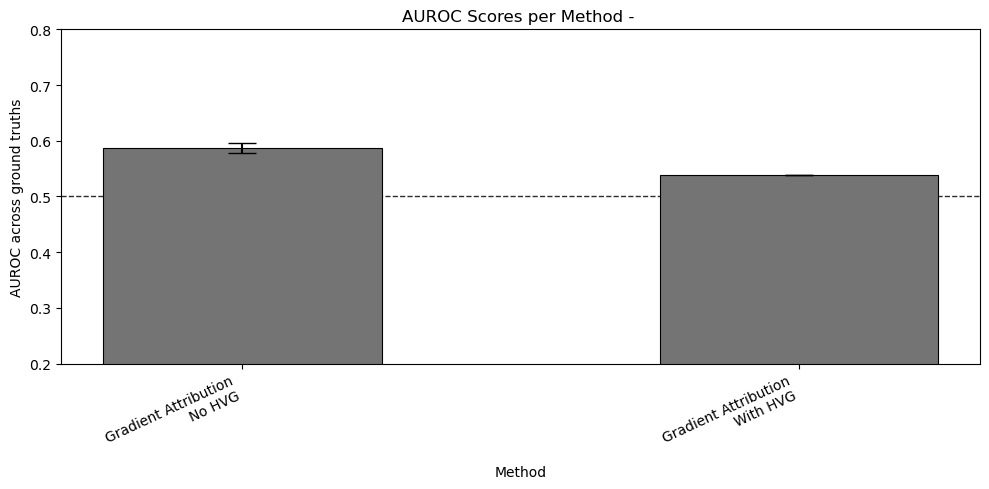

In [16]:
k562_no_hvg_mean_auroc = calculate_mean_auroc_for_method(all_exp_gt_dfs[1], "Gradient Attribution")
k562_hvg_mean_auroc = calculate_mean_auroc_for_method(all_exp_gt_dfs[0], "Gradient Attribution")
print(f"K562 with HVG filtering - Gradient Attribution mean AUROC: {k562_hvg_mean_auroc:.3f}")
print(f"K562 without HVG filtering - Gradient Attribution mean AUROC: {k562_no_hvg_mean_auroc:.3f}")

grad_attrib_k562_no_hvg = all_exp_gt_dfs[1][all_exp_gt_dfs[1]["name"] == "Gradient Attribution"]
grad_attrib_k562_no_hvg["name"] = "Gradient Attribution\nNo HVG"
grad_attrib_k562_hvg = all_exp_gt_dfs[0][all_exp_gt_dfs[0]["name"] == "Gradient Attribution"]
grad_attrib_k562_hvg["name"] = "Gradient Attribution\nWith HVG"

combined_df = pd.concat([grad_attrib_k562_no_hvg, grad_attrib_k562_hvg], ignore_index=True)
fig = plot_hvg_comparison_bar(combined_df, per_tf=False)
fig.show()

K562 with HVG filtering - Gradient Attribution per-TF AUROC: 0.564
K562 without HVG filtering - Gradient Attribution per-TF AUROC: 0.586


/tmp/ipykernel_2875061/735133391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_attrib_k562_no_hvg["name"] = "Gradient Attribution\nNo HVG"
/tmp/ipykernel_2875061/735133391.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_attrib_k562_hvg["name"] = "Gradient Attribution\nWith HVG"


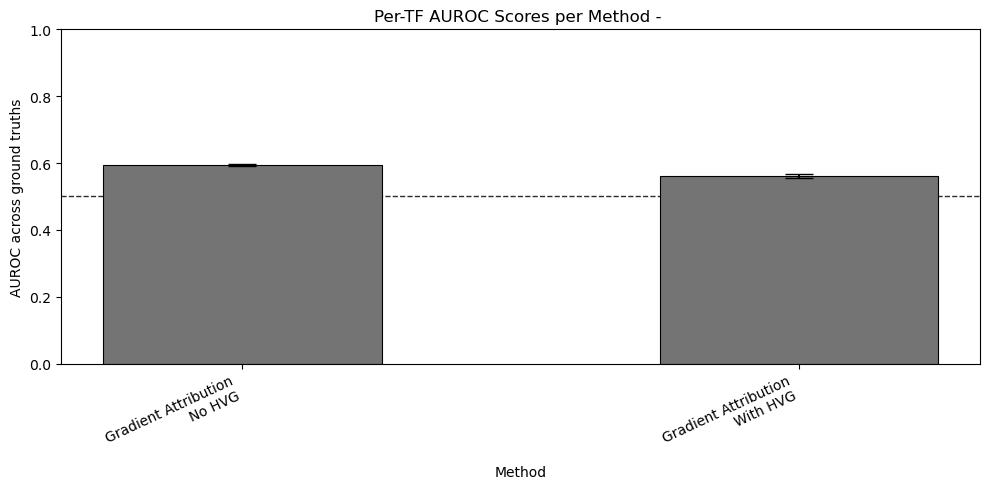

In [17]:
k562_no_hvg_mean_auroc = calculate_mean_per_tf_auroc(all_per_tf_dfs[1], "Gradient Attribution")
k562_hvg_mean_auroc = calculate_mean_per_tf_auroc(all_per_tf_dfs[0], "Gradient Attribution")
print(f"K562 with HVG filtering - Gradient Attribution per-TF AUROC: {k562_hvg_mean_auroc:.3f}")
print(f"K562 without HVG filtering - Gradient Attribution per-TF AUROC: {k562_no_hvg_mean_auroc:.3f}")

grad_attrib_k562_no_hvg = all_per_tf_dfs[1][all_per_tf_dfs[1]["method"] == "Gradient Attribution"]
grad_attrib_k562_no_hvg["name"] = "Gradient Attribution\nNo HVG"
grad_attrib_k562_hvg = all_per_tf_dfs[0][all_per_tf_dfs[0]["method"] == "Gradient Attribution"]
grad_attrib_k562_hvg["name"] = "Gradient Attribution\nWith HVG"

combined_df = pd.concat([grad_attrib_k562_no_hvg, grad_attrib_k562_hvg], ignore_index=True)
fig = plot_hvg_comparison_bar(combined_df, per_tf=True)
fig.show()

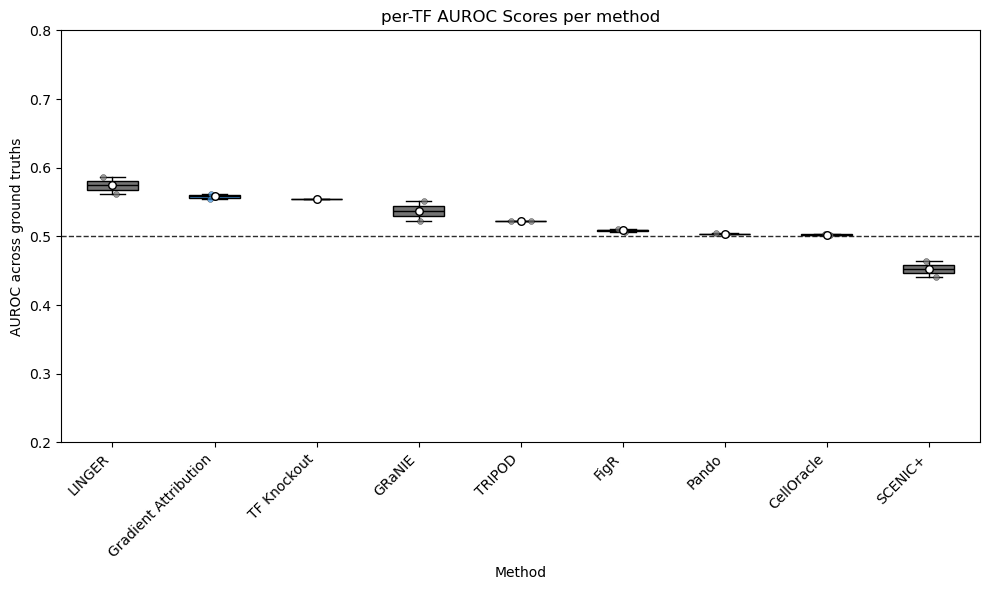

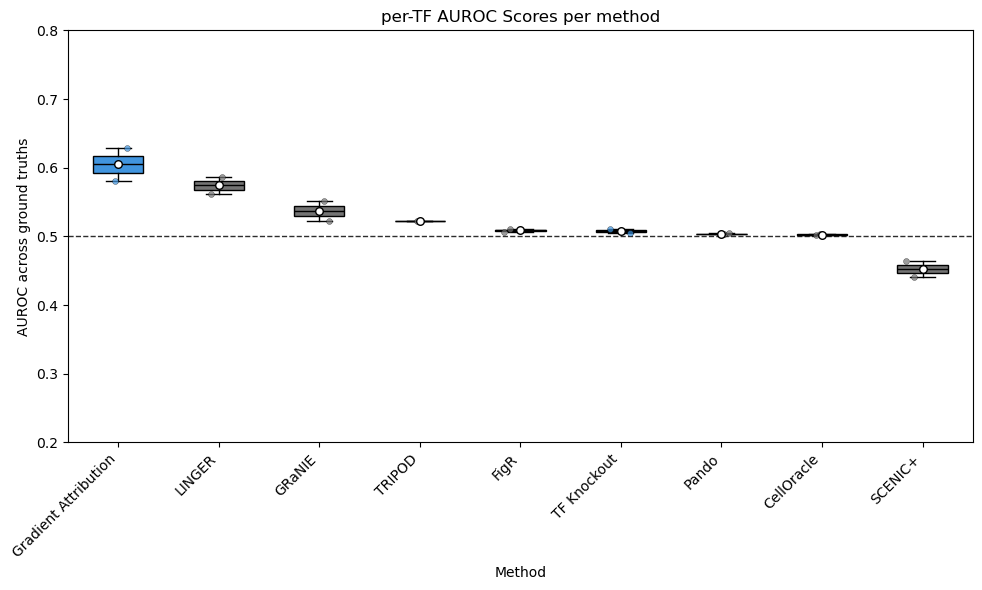

In [18]:
per_tf_method_one(all_per_tf_dfs[0])
per_tf_method_one(all_per_tf_dfs[1])

## HVG Filter Testing

Model testing settings:
- `HOPS`=2
- `D_MODEL`=128
- `D_FF`=512
- `BATCH_SIZE`=32
- `TOTAL_EPOCHS`=100

In [19]:
data = {
    "Experiment": [
        "Dispersion 0.6",
        "Dispersion 0.5",
        "Dispersion 0.4",
        "Dispersion 0.3",
        "Dispersion 0.2",
        "Dispersion 0.1",
        "Dispersion 0.05",
        "Dispersion 0.01",
        "No HVG Filtering",
    ],
    "TFs": [115, 134, 160, 181, 211, 238, 253, 272, 766],
    "TGs": [1699, 1889, 2109, 2372, 2671, 3026, 3221, 3670, 9210],
    "Peaks": [37385, 42507, 48321, 53509, 60138, 67031, 68513, 76120, 153151],
}
df = pd.DataFrame(data)
df

,Experiment,TFs,TGs,Peaks
0,Dispersion 0.6,115,1699,37385
1,Dispersion 0.5,134,1889,42507
2,Dispersion 0.4,160,2109,48321
3,Dispersion 0.3,181,2372,53509
4,Dispersion 0.2,211,2671,60138
5,Dispersion 0.1,238,3026,67031
6,Dispersion 0.05,253,3221,68513
7,Dispersion 0.01,272,3670,76120
8,No HVG Filtering,766,9210,153151


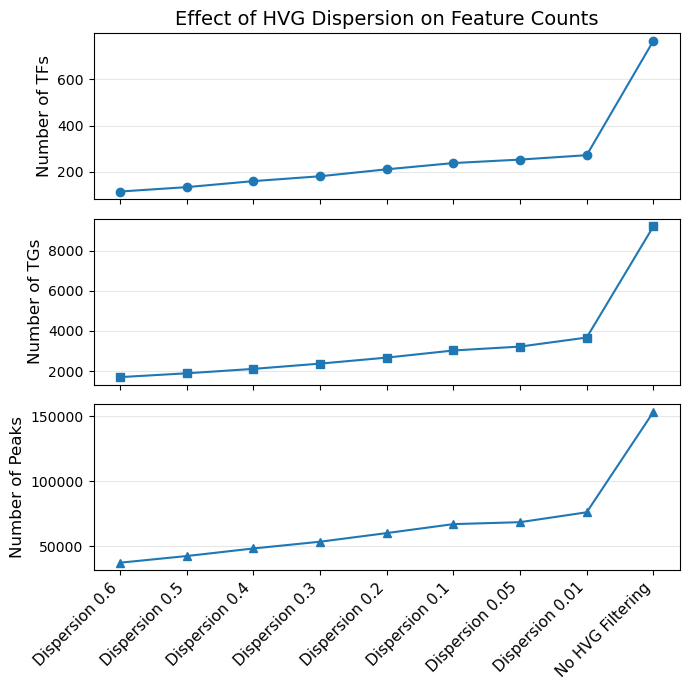

In [20]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(7, 7),
    sharex=True
)

# --- TFs ---
axes[0].plot(
    df["Experiment"],
    df["TFs"],
    marker="o",
)
axes[0].set_ylabel("Number of TFs", fontsize=12)
axes[0].set_title("Effect of HVG Dispersion on Feature Counts", fontsize=14)

# --- TGs ---
axes[1].plot(
    df["Experiment"],
    df["TGs"],
    marker="s",
)
axes[1].set_ylabel("Number of TGs", fontsize=12)

# --- Peaks ---
axes[2].plot(
    df["Experiment"],
    df["Peaks"],
    marker="^",
)
axes[2].set_ylabel("Number of Peaks", fontsize=12)

# --- X tick formatting ---
axes[2].set_xticks(range(len(df["Experiment"])))
axes[2].set_xticklabels(
    df["Experiment"],
    rotation=45,
    ha="right",
    fontsize=11,
)

# --- Aesthetics ---
for ax in axes:
    ax.grid(True, axis="y", alpha=0.3)

fig.tight_layout()
plt.show()


In [62]:
def plot_hvg_series_boxplot(df, per_tf=False, exp_name=""):
    import numpy as np
    import matplotlib.pyplot as plt

    # Ensure we have what we expect
    assert "name" in df.columns, "Expected df['name'] to hold experiment labels"
    assert "auroc" in df.columns, "Expected df['auroc'] to exist"

    # ---- order experiments by mean AUROC (high -> low) ----
    means = df.groupby("name")["auroc"].mean()
    exps = means.index.tolist()

    data = [df.loc[df["name"] == e, "auroc"].dropna().values for e in exps]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axhline(0.5, color="#2D2D2D", linestyle="--", linewidth=1, zorder=1)

    bp = ax.boxplot(
        data,
        widths=0.55,
        patch_artist=True,
        showfliers=False,
        medianprops=dict(color="black", linewidth=1.5),
        boxprops=dict(linewidth=0.8),
        whiskerprops=dict(linewidth=0.8),
        capprops=dict(linewidth=0.8),
    )

    # Color all boxes the same (since all are Gradient Attribution)
    box_color = "#4195df"
    for box in bp["boxes"]:
        box.set_facecolor(box_color)
        box.set_edgecolor("black")

    # ---- overlay jittered points + mean markers ----
    for i, e in enumerate(exps, start=1):
        y = df.loc[df["name"] == e, "auroc"].dropna().values
        if len(y) == 0:
            continue

        x = np.random.normal(loc=i, scale=0.06, size=len(y))
        ax.scatter(
            x, y,
            color=box_color,
            alpha=0.6,
            s=18,
            edgecolor="k",
            linewidth=0.3,
            zorder=3,
        )

        mean_val = y.mean()
        ax.scatter(
            i, mean_val,
            color="white",
            edgecolor="k",
            s=35,
            zorder=4,
        )
        # optional: annotate mean
        ax.text(i, y.max() + 0.015, f"{mean_val:.3f}", ha="center", va="bottom", fontsize=12)

    ax.set_xticks(np.arange(1, len(exps) + 1))
    ax.set_xticklabels(exps, rotation=25, ha="right", fontsize=11)

    ax.set_ylabel("AUROC across ground truths", fontsize=12)

    ax.set_title(f"{'Per-TF ' if per_tf else ''}AUROC (Gradient Attribution) - {exp_name}", fontsize=14)

    ax.set_ylim(0.0, 1)
    plt.tight_layout()
    return fig


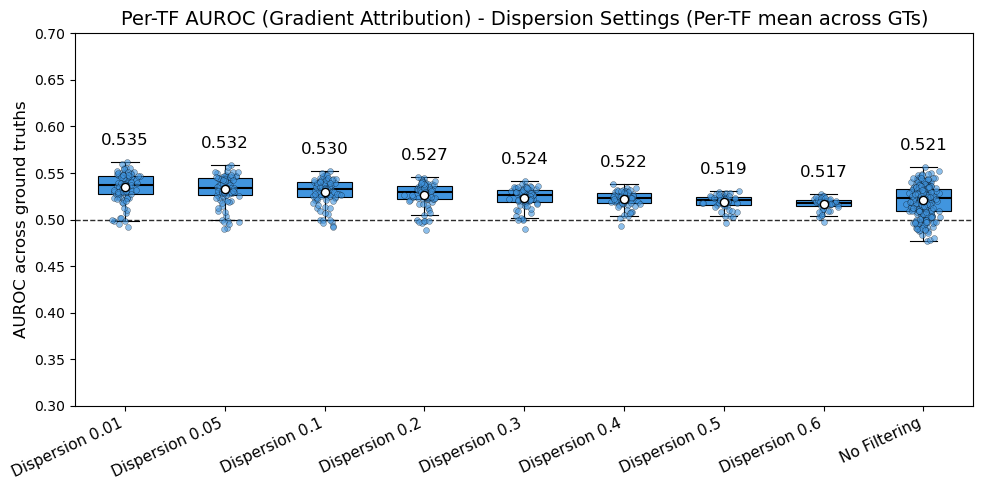

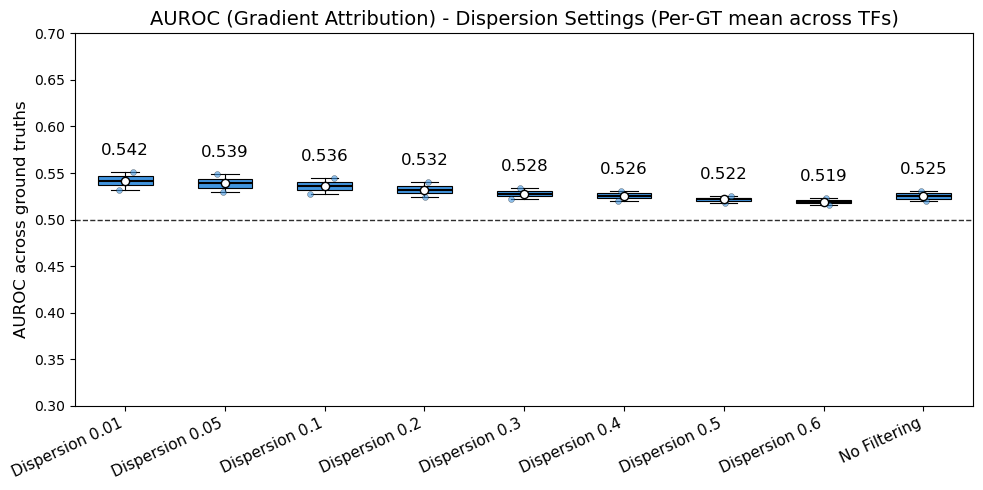

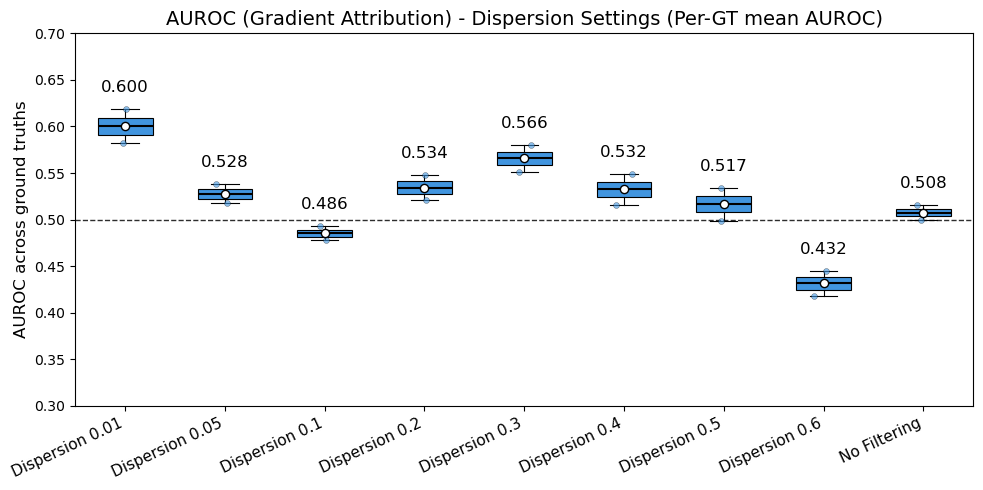

In [26]:
experiments_to_compare = {
        "Dispersion 0.6": "K562_hvg_filter_disp_0.6",
        "Dispersion 0.5": "K562_hvg_filter_disp_0.5",
        "Dispersion 0.4": "K562_hvg_filter_disp_0.4",
        "Dispersion 0.3": "K562_hvg_filter_disp_0.3",
        "Dispersion 0.2": "K562_hvg_filter_disp_0.2",
        "Dispersion 0.1": "K562_hvg_filter_disp_0.1",
        "Dispersion 0.05": "K562_hvg_filter_disp_0.05",
        "Dispersion 0.01": "K562_hvg_filter_disp_0.01",
        "No Filtering": "K562_hvg_filter_none",
}

# Plotting boxplots with all stability experiments together
all_per_tf_dfs = []
all_exp_gt_dfs = []
for experiment_name, experiment in experiments_to_compare.items():
    exp_per_tf_df, exp_per_gt_df = open_auc_data_files(experiment)
    
    exp_per_tf_df = exp_per_tf_df[exp_per_tf_df["method"] == "Gradient Attribution"]
    
    exp_per_gt_df = exp_per_gt_df.rename(columns={'name': 'method'})
    exp_per_gt_df = exp_per_gt_df[exp_per_gt_df["method"] == "Gradient Attribution"]
    
    exp_per_tf_df["name"] = experiment_name
    exp_per_gt_df["name"] = experiment_name
    
    all_per_tf_dfs.append(exp_per_tf_df)
    all_exp_gt_dfs.append(exp_per_gt_df)
    

per_tf_combined_df = pd.concat(all_per_tf_dfs, ignore_index=True)
per_gt_combined_df = pd.concat(all_exp_gt_dfs, ignore_index=True)

per_tf_mean_df = (
    per_tf_combined_df
    .groupby(["name", "tf"], as_index=False)["auroc"]
    .mean()
)

per_tf_fig = plot_hvg_series_boxplot(
    per_tf_mean_df,   # now each row is one TF
    per_tf=True,
    exp_name="Dispersion Settings (Per-TF mean across GTs)"
)

per_gt_mean_tf_df = (
    per_tf_combined_df
    .groupby(["name", "gt_name"], as_index=False)["auroc"]
    .mean()
)

per_gt_fig = plot_hvg_series_boxplot(
    per_gt_mean_tf_df,   # now each row is one GT
    per_tf=False,
    exp_name="Dispersion Settings (Per-GT mean across TFs)"
)



per_gt_mean_df = (
    per_gt_combined_df
    .groupby(["name", "gt_name"], as_index=False)["auroc"]
    .mean()
)

per_gt_fig = plot_hvg_series_boxplot(
    per_gt_mean_df,   # now each row is one GT
    per_tf=False,
    exp_name="Dispersion Settings (Per-GT mean AUROC)"
)



In [23]:
per_tf_combined_df

,tf,auroc,auprc,n_edges,n_pos,n_neg,n_edges_bal,method,gt_name,experiment,name
0,ATF3,0.516782,0.514298,40148,24460,15688,31376,Gradient Attribution,ChIP-Atlas,K562_hvg_filter_disp_0.6,Dispersion 0.6
1,BCL6,0.517130,0.518083,40148,784,39364,1568,Gradient Attribution,ChIP-Atlas,K562_hvg_filter_disp_0.6,Dispersion 0.6
2,CGGBP1,0.511552,0.514051,40148,807,39341,1614,Gradient Attribution,ChIP-Atlas,K562_hvg_filter_disp_0.6,Dispersion 0.6
3,CREB3L1,0.518342,0.510996,40148,9639,30509,19278,Gradient Attribution,ChIP-Atlas,K562_hvg_filter_disp_0.6,Dispersion 0.6
4,CREB5,0.516991,0.518240,40148,602,39546,1204,Gradient Attribution,ChIP-Atlas,K562_hvg_filter_disp_0.6,Dispersion 0.6
...,...,...,...,...,...,...,...,...,...,...,...
795,ZNF263,0.530041,0.522256,26089,19224,6865,13730,Gradient Attribution,RN117,K562_hvg_filter_disp_0.01,Dispersion 0.01
796,ZNF280A,0.538905,0.536079,26089,4613,21476,9226,Gradient Attribution,RN117,K562_hvg_filter_disp_0.01,Dispersion 0.01
797,ZNF3,0.546943,0.541852,26089,15890,10199,20398,Gradient Attribution,RN117,K562_hvg_filter_disp_0.01,Dispersion 0.01
798,ZNF407,0.529217,0.522834,26089,297,25792,594,Gradient Attribution,RN117,K562_hvg_filter_disp_0.01,Dispersion 0.01


name
Dispersion 0.01    0.600365
Dispersion 0.05    0.527722
Dispersion 0.1     0.485520
Dispersion 0.2     0.534362
Dispersion 0.3     0.565801
Dispersion 0.4     0.532359
Dispersion 0.5     0.516553
Dispersion 0.6     0.431670
Name: auroc, dtype: float64


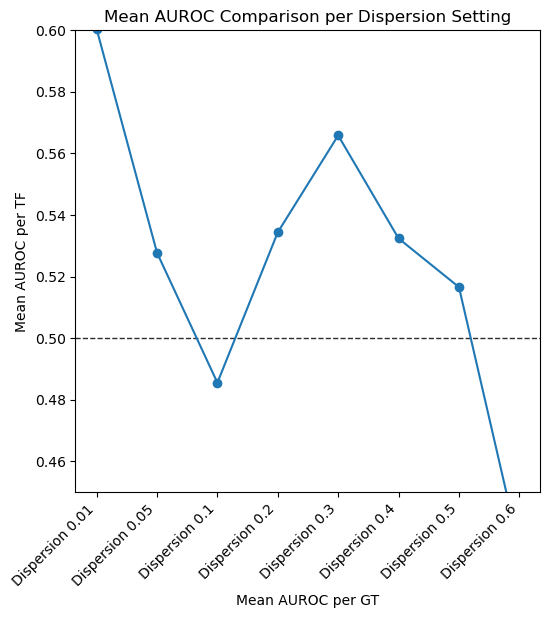

name
Dispersion 0.01    0.600365
Dispersion 0.05    0.527722
Dispersion 0.1     0.485520
Dispersion 0.2     0.534362
Dispersion 0.3     0.565801
Name: auroc, dtype: float64

In [24]:
per_gt_exp_mean = per_gt_mean_df.groupby("name")["auroc"].mean()
per_tf_exp_mean = per_tf_mean_df.groupby("name")["auroc"].mean()

print(per_gt_exp_mean)

fig = plt.figure(figsize=(6,6))
plt.plot(per_gt_exp_mean.index, per_gt_exp_mean, marker='o')

plt.axhline(0.5, color="#2D2D2D", linestyle="--", linewidth=1, zorder=1)

plt.xlabel("Mean AUROC per GT")
plt.ylabel("Mean AUROC per TF")

plt.xticks(rotation=45, ha="right")
plt.ylim(0.45, 0.6)

plt.title("Mean AUROC Comparison per Dispersion Setting")
plt.show()
per_gt_exp_mean.head()

In [ ]:
grad_attrib_df = pd.read_csv("/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/mES_two_hop_hvg_small/chr19/model_training_001/score_grns/Gradient_Attribution.csv")
grad_attrib_df.head()

,TF,TG
0,Acp1,Hba-a1
1,Acp2,Hba-a1
2,Ap1,Clu
3,Ap1,Fabp4
4,Ap1,Mbp


In [32]:
combined_gt_df = pd.read_csv("data/ground_truth_files/combined_ground_truth.csv")
combined_gt_df["TF"] = combined_gt_df["TF"].str.upper()
combined_gt_df["TG"] = combined_gt_df["TG"].str.upper()
combined_gt_df.head()

,TF,TG
0,ACP1,HBA-A1
1,ACP2,HBA-A1
2,AP1,CLU
3,AP1,FABP4
4,AP1,MBP


In [37]:
print(f"Overlap Unique TFs: {len(set(grad_attrib_df['Source']).intersection(set(combined_gt_df['TF'])))}")
print(f"Overlap Unique TGs: {len(set(grad_attrib_df['Target']).intersection(set(combined_gt_df['TG'])))}")
print(f"Overlapping Edges: {len(set(zip(grad_attrib_df['Source'], grad_attrib_df['Target'])).intersection(set(zip(combined_gt_df['TF'], combined_gt_df['TG']))))}")

Overlap Unique TFs: 110
Overlap Unique TGs: 23609
Overlapping Edges: 386774


In [40]:
gt_pairs = pd.MultiIndex.from_frame(combined_gt_df[["TF", "TG"]])
edge_pairs = pd.MultiIndex.from_frame(grad_attrib_df[["Source", "Target"]])

grad_attrib_df["Edge in GT"] = edge_pairs.isin(gt_pairs)
grad_attrib_df.head()

,Source,Target,Score,Edge in GT
0,AHR,0610005C13RIK,0.000766,False
1,AHR,0610009E02RIK,0.003788,False
2,AHR,0610009L18RIK,0.000766,False
3,AHR,0610030E20RIK,0.000766,False
4,AHR,0610031O16RIK,0.000766,False


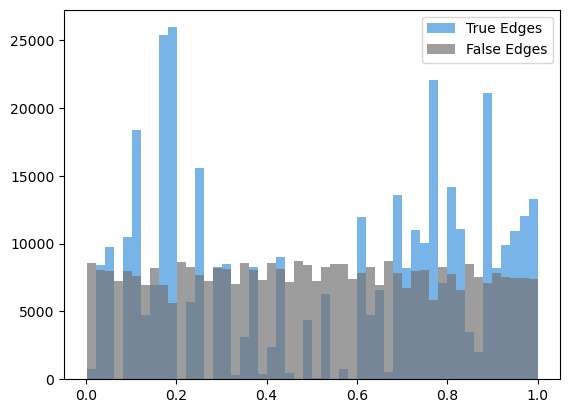

In [51]:
from scipy.stats import rankdata

# Combine scores
all_scores = grad_attrib_df["Score"].values

# Rank globally
all_ranks = rankdata(all_scores, method="average") / len(all_scores)

# Attach back
grad_attrib_df["Score_rank"] = all_ranks

true_value_rank = grad_attrib_df.loc[
    grad_attrib_df["Edge in GT"], "Score_rank"
]

false_value_rank = grad_attrib_df.loc[
    ~grad_attrib_df["Edge in GT"], "Score_rank"
].sample(n=len(true_value_rank), random_state=42)


plt.hist(true_value_rank, color="#4195df", bins=50, log=False, alpha=0.7, label="True Edges")
plt.hist(false_value_rank, color="#747474", bins=50, log=False, alpha=0.7, label="False Edges")
plt.legend()
plt.show()

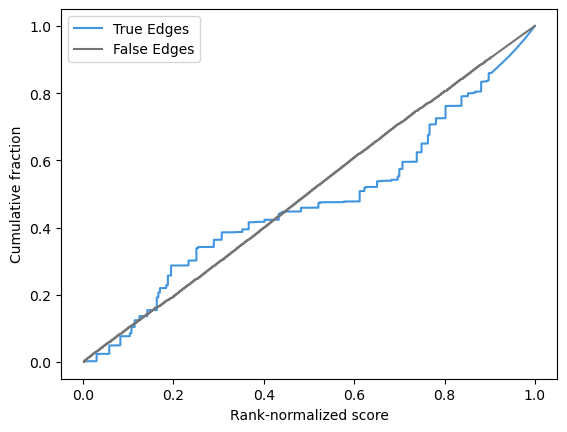

In [52]:
def ecdf(x):
    x = np.sort(x)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_t, y_t = ecdf(true_value_rank)
x_f, y_f = ecdf(false_value_rank)

plt.plot(x_t, y_t, label="True Edges", color="#4195df")
plt.plot(x_f, y_f, label="False Edges", color="#747474")
plt.xlabel("Rank-normalized score")
plt.ylabel("Cumulative fraction")
plt.legend()
plt.show()


In [67]:
s = grad_attrib_df["Score"].to_numpy()
n = len(s)
n_unique = len(np.unique(s))
print("N:", n, "unique:", n_unique, "unique_frac:", n_unique/n)

# how many zeros?
print("zero_frac:", (s == 0).mean())


N: 6423040 unique: 654695 unique_frac: 0.10192914881426864
zero_frac: 0.003505038112793942


,Source,Target,Score,Edge in GT,Score Rank,Score_rank
0,AHR,0610005C13RIK,0.000766,False,2468810.0,0.615632
1,AHR,0610009E02RIK,0.003788,False,524518.5,0.918338
2,AHR,0610009L18RIK,0.000766,False,2468810.0,0.615632
3,AHR,0610030E20RIK,0.000766,False,2468810.0,0.615632
4,AHR,0610031O16RIK,0.000766,False,2468810.0,0.615632
...,...,...,...,...,...,...
6423035,ZIC2,ZYG11A,0.000327,False,5443619.0,0.152486
6423036,ZIC2,ZYG11B,0.000327,False,5443619.0,0.152486
6423037,ZIC2,ZYX,0.000327,False,5443619.0,0.152486
6423038,ZIC2,ZZEF1,0.000327,False,5443619.0,0.152486


In [47]:
false_values.describe()

count    386774.000000
mean          0.003121
std           0.013867
min           0.000000
25%           0.000574
50%           0.000707
75%           0.000825
max           0.856468
Name: Score, dtype: float64

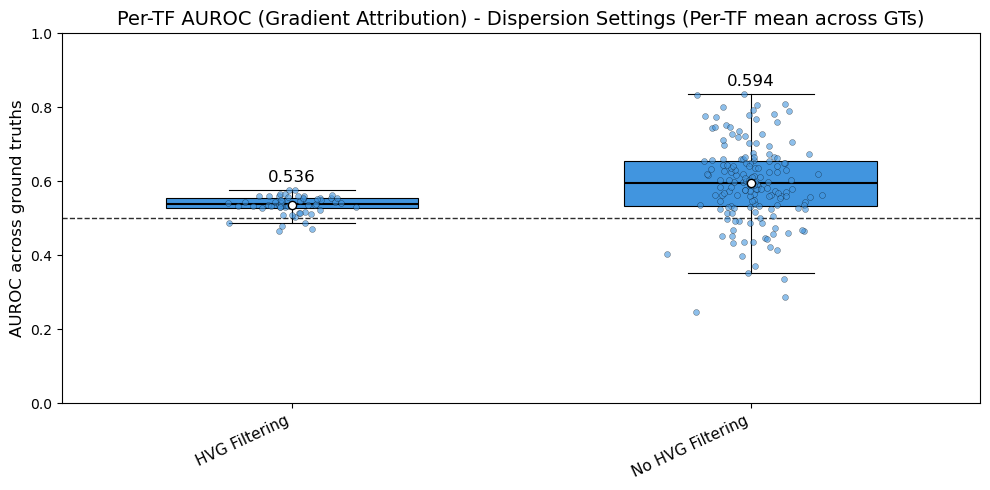

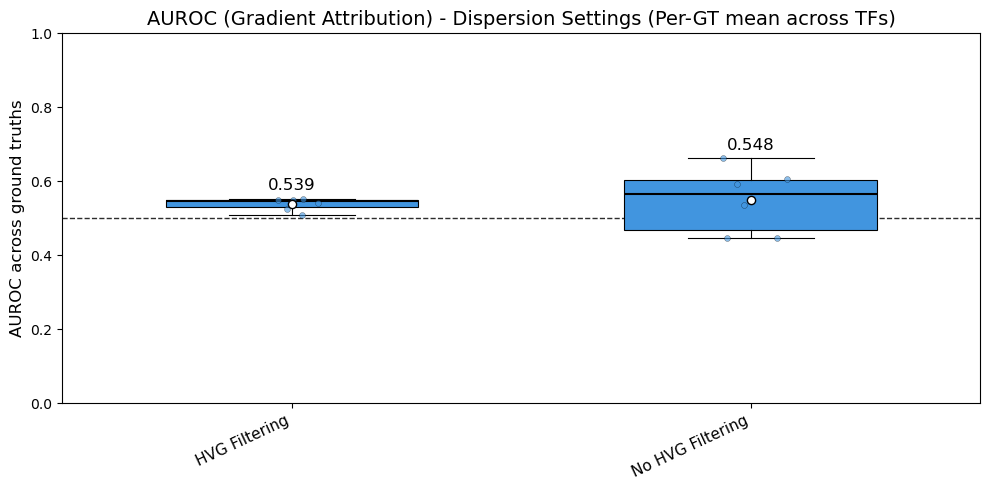

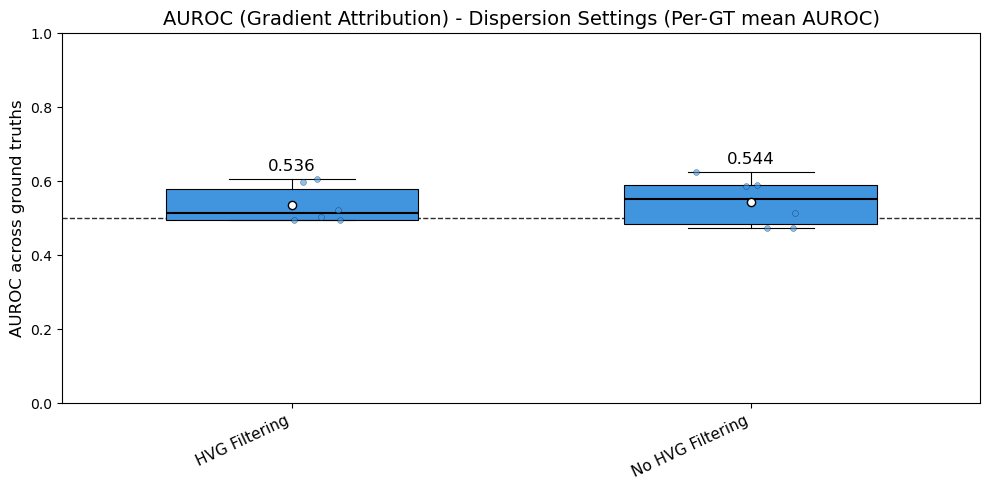

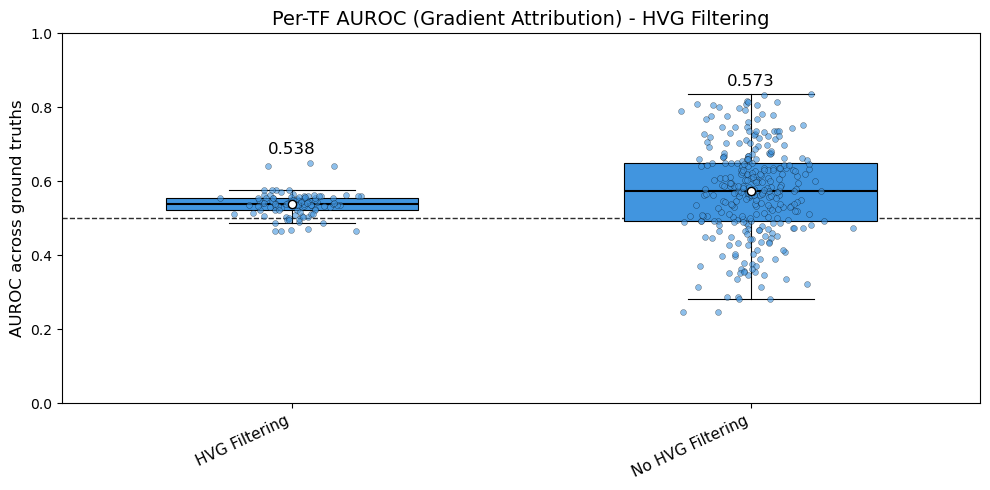

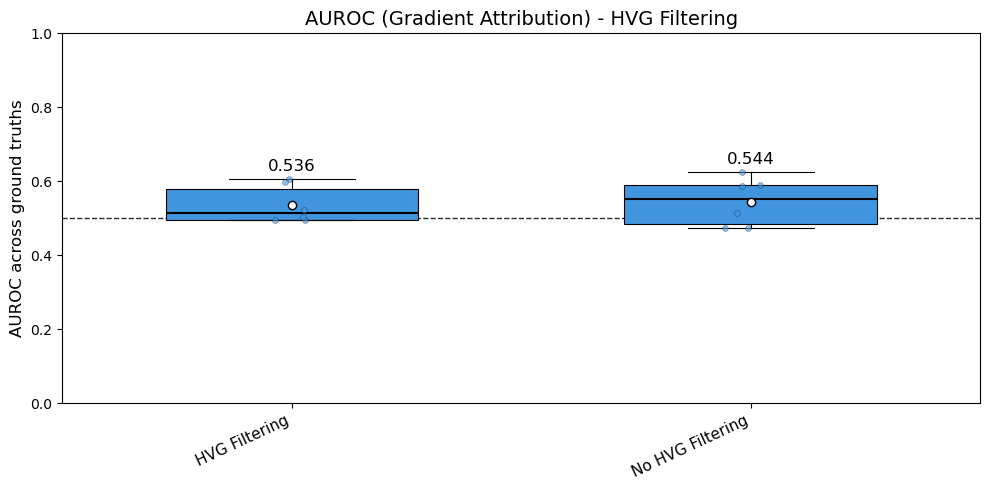

In [66]:
experiments = {
    "No HVG Filtering": "mESC_two_hop_no_hvg_small",
    "HVG Filtering": "mES_two_hop_hvg_small",
}

exp_per_gt_df_list = []
exp_per_tf_df_list = []
for experiment_name, experiment in experiments.items():
    if experiment_name == "HVG Filtering":
        exp_per_tf_df, exp_per_gt_df = open_auc_data_files(experiment)
    else:
        exp_per_tf_df, exp_per_gt_df = open_auc_data_files(experiment, model_num=2)
    exp_per_gt_df = exp_per_gt_df.rename(columns={'name': 'method'})
    exp_per_gt_df = exp_per_gt_df[exp_per_gt_df["method"] == "Gradient Attribution"]
    exp_per_gt_df["name"] = experiment_name
    exp_per_tf_df = exp_per_tf_df[exp_per_tf_df["method"] == "Gradient Attribution"]
    exp_per_tf_df["name"] = experiment_name
    exp_per_gt_df_list.append(exp_per_gt_df)
    exp_per_tf_df_list.append(exp_per_tf_df)
    
exp_per_gt_df = pd.concat(exp_per_gt_df_list, ignore_index=True)
exp_per_tf_df = pd.concat(exp_per_tf_df_list, ignore_index=True)


per_tf_mean_df = (
    exp_per_tf_df
    .groupby(["name", "tf"], as_index=False)["auroc"]
    .mean()
)

per_tf_fig = plot_hvg_series_boxplot(
    per_tf_mean_df,   # now each row is one TF
    per_tf=True,
    exp_name="Dispersion Settings (Per-TF mean across GTs)"
)

per_gt_mean_tf_df = (
    exp_per_tf_df
    .groupby(["name", "gt_name"], as_index=False)["auroc"]
    .mean()
)

per_gt_fig = plot_hvg_series_boxplot(
    per_gt_mean_tf_df,   # now each row is one GT
    per_tf=False,
    exp_name="Dispersion Settings (Per-GT mean across TFs)"
)



per_gt_mean_df = (
    exp_per_gt_df
    .groupby(["name", "gt_name"], as_index=False)["auroc"]
    .mean()
)

per_gt_fig = plot_hvg_series_boxplot(
    per_gt_mean_df,   # now each row is one GT
    per_tf=False,
    exp_name="Dispersion Settings (Per-GT mean AUROC)"
)


fig = plot_hvg_series_boxplot(
    exp_per_tf_df,   # now each row is one TF
    per_tf=True,
    exp_name=experiment_name
)

fig = plot_hvg_series_boxplot(
    exp_per_gt_df,   # now each row is one GT
    per_tf=False,
    exp_name=experiment_name
)

## Testing Gradient Attribution

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
import seaborn as sns
import torch

EXPERIMENT_DIR = Path("/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/mESC_two_hop_no_hvg_small/chr19/model_training_002/")

def load_vocab(selected_experiment_dir):
    id2name = torch.load(selected_experiment_dir / "tf_tg_vocab_id2name.pt", map_location="cpu")
    tf_names = list(id2name["tf_id2name"])
    tg_names = list(id2name["tg_id2name"])

    return tf_names, tg_names

def load_ground_truth(ground_truth_file):
    if ground_truth_file.suffix == ".csv":
        sep = ","
    elif ground_truth_file.suffix == ".tsv":
        sep="\t"
        
    ground_truth_df = pd.read_csv(ground_truth_file, sep=sep, on_bad_lines="skip", engine="python")
    
    if "chip" in ground_truth_file.name and "atlas" in ground_truth_file.name:
        ground_truth_df = ground_truth_df[["source_id", "target_id"]]

    ground_truth_df = ground_truth_df.rename(columns={ground_truth_df.columns[0]: "Source", ground_truth_df.columns[1]: "Target"})
    ground_truth_df["Source"] = ground_truth_df["Source"].astype(str).str.upper()
    ground_truth_df["Target"] = ground_truth_df["Target"].astype(str).str.upper()
        
    return ground_truth_df

def prep_gt_edges(gt_df: pd.DataFrame) -> pd.DataFrame:
    gt = gt_df[["Source", "Target"]].dropna().copy()
    gt["Source"] = gt["Source"].astype(str).str.upper()
    gt["Target"] = gt["Target"].astype(str).str.upper()
    gt = gt.drop_duplicates()
    gt["_in_gt"] = 1
    return gt

def eval_method_vs_gt(method_df: pd.DataFrame, gt_edges: pd.DataFrame, top_fracs=(0.001, 0.005, 0.01, 0.05)):
    if method_df is None or len(method_df) == 0:
        # return NaNs but keep consistent columns
        out = {
            "AUROC": np.nan, "AUPRC": np.nan, "pos_rate": np.nan, "lift_auprc": np.nan
        }
        for frac in top_fracs:
            out[f"Precision@{frac*100:.2f}%"] = np.nan
            out[f"Lift@{frac*100:.2f}%"] = np.nan
        return out

    d = method_df.merge(gt_edges, on=["Source", "Target"], how="left")
    y = d["_in_gt"].fillna(0).astype(int).to_numpy()
    s = d["Score"].to_numpy()

    auroc = roc_auc_score(y, s) if np.unique(y).size == 2 else np.nan
    auprc = average_precision_score(y, s) if y.sum() > 0 else np.nan
    pos_rate = y.mean()

    order = np.argsort(s)[::-1]
    y_sorted = y[order]
    tp = np.cumsum(y_sorted)
    k = np.arange(1, len(y_sorted) + 1)
    prec = tp / k

    prec_at = {}
    for frac in top_fracs:
        K = int(frac * len(y_sorted))
        if K < 1:
            K = 1
        if K > len(prec):      # <-- key guard
            K = len(prec)
        prec_at[f"Precision@{frac*100:.2f}%"] = float(prec[K-1]) if len(prec) else np.nan
        prec_at[f"Lift@{frac*100:.2f}%"] = float(prec[K-1] / pos_rate) if (len(prec) and pos_rate > 0) else np.nan

    return {
        "AUROC": float(auroc) if auroc == auroc else np.nan,
        "AUPRC": float(auprc) if auprc == auprc else np.nan,
        "pos_rate": float(pos_rate) if pos_rate == pos_rate else np.nan,
        "lift_auprc": float(auprc / pos_rate) if (pos_rate > 0 and auprc == auprc) else np.nan,
        **prec_at
    }

def restrict_to_gt_universe(method_df: pd.DataFrame, gt_edges: pd.DataFrame) -> pd.DataFrame:
    gt_tfs = set(gt_edges["Source"])
    gt_tgs = set(gt_edges["Target"])
    return method_df[method_df["Source"].isin(gt_tfs) & method_df["Target"].isin(gt_tgs)].copy()

def load_grad_df_with_two_scores(selected_experiment_dir, tf_names, tg_names):
    grad = np.load(selected_experiment_dir / "tf_tg_grad_attribution.npy").astype(np.float32)
    assert grad.shape == (len(tf_names), len(tg_names))

    grad = np.nan_to_num(grad, nan=0.0)
    g = np.abs(grad)

    score_pooled = np.log1p(g)

    med = np.median(g, axis=1, keepdims=True)
    mad = np.median(np.abs(g - med), axis=1, keepdims=True) + 1e-6
    score_per_tf = (g - med) / mad

    T, G = g.shape
    tf_idx, tg_idx = np.meshgrid(np.arange(T), np.arange(G), indexing="ij")

    df = pd.DataFrame({
        "Source": np.asarray(tf_names, dtype=object)[tf_idx.ravel()],
        "Target": np.asarray(tg_names, dtype=object)[tg_idx.ravel()],
        "Score_pooled": score_pooled.ravel(),
        "Score_per_tf": score_per_tf.ravel(),
    })
    df["Source"] = df["Source"].astype(str).str.upper()
    df["Target"] = df["Target"].astype(str).str.upper()
    return df

def per_tf_auroc(method_df, gt_edges):
    d = method_df.merge(
        gt_edges.assign(_in_gt=1),
        on=["Source", "Target"],
        how="left"
    )
    d["_in_gt"] = d["_in_gt"].fillna(0).astype(int)

    rows = []
    for tf, g in d.groupby("Source"):
        y = g["_in_gt"].to_numpy()
        s = g["Score"].to_numpy()

        if y.sum() >= 1 and y.sum() < len(y):
            auc = roc_auc_score(y, s)
            rows.append({
                "TF": tf,
                "AUROC": auc,
                "n_pos": int(y.sum()),
                "n_neg": int(len(y) - y.sum())
            })

    return pd.DataFrame(rows)

def per_tf_precision_at_k(method_df, gt_edges, frac=0.01):
    d = method_df.merge(
        gt_edges.assign(_in_gt=1),
        on=["Source", "Target"],
        how="left"
    )
    d["_in_gt"] = d["_in_gt"].fillna(0).astype(int)

    rows = []
    for tf, g in d.groupby("Source"):
        y = g["_in_gt"].to_numpy()
        s = g["Score"].to_numpy()

        if y.sum() == 0:
            continue

        K = max(1, int(frac * len(y)))
        order = np.argsort(s)[::-1][:K]
        prec = y[order].mean()

        rows.append({
            "TF": tf,
            f"Precision@{int(frac*100)}%": prec,
            "pos_rate": y.mean()
        })

    return pd.DataFrame(rows)

def load_and_standardize_method(name: str, info: dict) -> pd.DataFrame:
    """
    Load a GRN CSV and rename tf_col/target_col/score_col -> Source/Target/Score.
    Extra columns are preserved.
    """
    if info["path"].suffix == ".tsv":
        sep = "\t"
    elif info["path"].suffix == ".csv":
        sep = ","
    
    df = pd.read_csv(info["path"], sep=sep, header=0, index_col=None)

    tf_col     = info["tf_col"]
    target_col = info["target_col"]
    score_col  = info["score_col"]

    rename_map = {
        tf_col: "Source",
        target_col: "Target",
        score_col: "Score",
    }

    missing = [c for c in rename_map if c not in df.columns]
    if missing:
        raise ValueError(f"[{name}] Missing expected columns: {missing}. Got: {list(df.columns)}")

    df = df.rename(columns=rename_map)

    df = df[["Source", "Target", "Score"]]
    df["Source"] = df["Source"].astype(str).str.upper()
    df["Target"] = df["Target"].astype(str).str.upper()

    return df

def per_tf_metrics(method_df: pd.DataFrame, gt_edges: pd.DataFrame, top_fracs=(0.001, 0.005, 0.01, 0.05)):
    """
    Returns a per-TF dataframe with:
      TF, AUROC, n_pos, n_neg, pos_rate, Precision@K, Lift@K (for each K)
    Assumes method_df has Source/Target/Score and is already restricted to GT universe (recommended).
    """
    # Label edges
    d = method_df.merge(gt_edges, on=["Source", "Target"], how="left")
    d["_in_gt"] = d["_in_gt"].fillna(0).astype(int)

    rows = []
    for tf, g in d.groupby("Source", sort=False):
        y = g["_in_gt"].to_numpy()
        s = g["Score"].to_numpy()
        n = len(y)
        n_pos = int(y.sum())
        n_neg = int(n - n_pos)
        pos_rate = (n_pos / n) if n > 0 else np.nan

        # AUROC defined only if both classes present
        auc = roc_auc_score(y, s) if (n_pos > 0 and n_neg > 0) else np.nan

        # Pre-sort once for precision@K
        order = np.argsort(s)[::-1]
        y_sorted = y[order]
        tp = np.cumsum(y_sorted)

        row = {
            "TF": tf,
            "n_edges": n,
            "n_pos": n_pos,
            "n_neg": n_neg,
            "pos_rate": pos_rate,
            "AUROC": float(auc) if auc == auc else np.nan,
        }

        for frac in top_fracs:
            K = max(1, int(frac * n))
            K = min(K, n)
            prec_k = float(tp[K-1] / K) if n > 0 else np.nan
            row[f"Precision@{frac*100:.2f}%"] = prec_k
            row[f"Lift@{frac*100:.2f}%"] = (prec_k / pos_rate) if (pos_rate and pos_rate > 0) else np.nan

        rows.append(row)

    return pd.DataFrame(rows)


tf_names, tg_names = load_vocab(EXPERIMENT_DIR)

PROJECT_DIR = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER"
GROUND_TRUTH_DIR = Path(PROJECT_DIR, "data/ground_truth_files")

ground_truth_file_dict = {
    "ChIP-Atlas": GROUND_TRUTH_DIR / "chip_atlas_tf_peak_tg_dist.csv",
    "RN111": GROUND_TRUTH_DIR / "RN111.tsv",
    "RN112": GROUND_TRUTH_DIR / "RN112.tsv",
    "RN114": GROUND_TRUTH_DIR / "RN114.tsv",
    "RN116": GROUND_TRUTH_DIR / "RN116.tsv",
}

# Loop through each ground truth dataset and load each file
ground_truth_df_dict = {}
for i, (gt_name, ground_truth_file) in enumerate(ground_truth_file_dict.items(), start=1):
    print(f"Loading {gt_name} ({i}/{len(ground_truth_file_dict)})")

    # --- Ground truth & sets ---
    ground_truth_df = load_ground_truth(ground_truth_file)
    
    ground_truth_df_dict[gt_name] = ground_truth_df
    print(f"  - TFs: {ground_truth_df['Source'].nunique():,}, TGs: {ground_truth_df['Target'].nunique():,}, Edges: {len(ground_truth_df):,}")

ground_truth_edges_dict = {gt: prep_gt_edges(df) for gt, df in ground_truth_df_dict.items()}

DIR = Path("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.GRN_BENCHMARKING.MOELLER/testing_bear_grn/INFERRED.GRNS")
sample_name = "E7.5_rep1"
cell_oracle_path  = DIR / f"{sample_name}/CellOracle/filtered_L2_{sample_name}_out_E7.5_rep1_final_GRN.csv"
directnet_path    = DIR / f"{sample_name}/DIRECTNET/{sample_name}_all_cells_Network_links.csv"
figr_path         = DIR / f"{sample_name}/FigR/{sample_name}_all_cells_filtered_network.csv"
granie_path       = DIR / f"{sample_name}/GRaNIE/GRN_connections_filtered_sorted_sc{sample_name}_all_cells_selected_uniq.csv"
linger_path       = DIR / f"{sample_name}/LINGER/filtered_L2_{sample_name}.csv"
pando_path        = DIR / f"{sample_name}/Pando/{sample_name}_all_cells_raw_network.csv"
scenic_plus_path  = DIR / f"{sample_name}/SCENIC+/scenic_plus_inferred_grn_mESC_filtered_L2_{sample_name}.tsv"
tripod_path       = DIR / f"{sample_name}/TRIPOD/gene_TF_highest_abs_coef.csv"

method_info = {
    "CellOracle": {"path": cell_oracle_path, "tf_col": "source",    "target_col": "target",    "score_col": "coef_mean"},
    "SCENIC+":    {"path": scenic_plus_path, "tf_col": "Source",    "target_col": "Target",    "score_col": "Score"},
    "Pando":      {"path": pando_path,       "tf_col": "tf",        "target_col": "target",    "score_col": "estimate"},
    "LINGER":     {"path": linger_path,      "tf_col": "Source",    "target_col": "Target",    "score_col": "Score"},
    "FigR":       {"path": figr_path,        "tf_col": "Motif",     "target_col": "DORC",      "score_col": "Score"},
    "TRIPOD":     {"path": tripod_path,      "tf_col": "TF",        "target_col": "gene",      "score_col": "abs_coef"},
    "GRaNIE":     {"path": granie_path,      "tf_col": "TF.name",   "target_col": "gene.name", "score_col": "TF_gene.r"},
}
        
standardized_method_dict = {}

for method_name, info in method_info.items():
    df_std = load_and_standardize_method(method_name, info)
    standardized_method_dict[method_name] = df_std

grad_attrib_df = load_grad_df_with_two_scores(
    selected_experiment_dir=EXPERIMENT_DIR,
    tf_names=tf_names,
    tg_names=tg_names,
)

grad_df = grad_attrib_df.copy()
grad_df["Score"] = grad_df["Score_pooled"]
grad_df = grad_df[["Source", "Target", "Score"]]

standardized_method_dict["Gradient Attribution"] = grad_df

all_results = []

for method_name, method_df in standardized_method_dict.items():
    print(f"Evaluating {method_name}")

    for gt_name, gt_edges in ground_truth_edges_dict.items():
        d_eval = restrict_to_gt_universe(method_df, gt_edges)

        if len(d_eval) == 0:
            print(f"  - {gt_name}: no overlap, skipping")
            continue

        metrics = eval_method_vs_gt(d_eval, gt_edges)

        all_results.append({
            "method": method_name,
            "gt": gt_name,
            **metrics
        })

results_df = pd.DataFrame(all_results)
results_df.groupby("method")["AUROC"].mean().sort_values(ascending=False)

top_fracs = (0.001, 0.005, 0.01, 0.05)

per_tf_all = []       # full per-TF rows (optional but useful)
per_tf_summary = []   # summarized metrics per method×gt

for method_name, method_df in standardized_method_dict.items():
    print(f"Per-TF evaluating {method_name}")

    for gt_name, gt_edges in ground_truth_edges_dict.items():
        d_eval = restrict_to_gt_universe(method_df, gt_edges)
        if len(d_eval) == 0:
            continue

        tf_df = per_tf_metrics(d_eval, gt_edges, top_fracs=top_fracs)
        tf_df.insert(0, "gt", gt_name)
        tf_df.insert(0, "method", method_name)
        per_tf_all.append(tf_df)

        # --- summarize ---
        defined = tf_df.dropna(subset=["AUROC"])
        frac_defined = len(defined) / len(tf_df) if len(tf_df) else np.nan

        row = {
            "method": method_name,
            "gt": gt_name,
            "n_tf_total": int(len(tf_df)),
            "n_tf_auroc_defined": int(len(defined)),
            "frac_tf_auroc_defined": float(frac_defined) if frac_defined == frac_defined else np.nan,
            "mean_per_tf_AUROC": float(defined["AUROC"].mean()) if len(defined) else np.nan,
            "median_per_tf_AUROC": float(defined["AUROC"].median()) if len(defined) else np.nan,
        }

        # summarize lift@K across TFs (median is more robust than mean)
        for frac in top_fracs:
            lift_col = f"Lift@{frac*100:.2f}%"
            lift_vals = tf_df.replace([np.inf, -np.inf], np.nan).dropna(subset=[lift_col])[lift_col]
            row[f"median_{lift_col}"] = float(lift_vals.median()) if len(lift_vals) else np.nan
            row[f"mean_{lift_col}"] = float(lift_vals.mean()) if len(lift_vals) else np.nan

        per_tf_summary.append(row)

per_tf_all_df = pd.concat(per_tf_all, ignore_index=True) if per_tf_all else pd.DataFrame()
per_tf_summary_df = pd.DataFrame(per_tf_summary)

per_tf_summary_df.head()


Loading ChIP-Atlas (1/5)
  - TFs: 131, TGs: 24,821, Edges: 7,734,466
Loading RN111 (2/5)
  - TFs: 247, TGs: 25,692, Edges: 972,636
Loading RN112 (3/5)
  - TFs: 55, TGs: 16,522, Edges: 104,201
Loading RN114 (4/5)
  - TFs: 47, TGs: 21,240, Edges: 107,980
Loading RN116 (5/5)
  - TFs: 21, TGs: 4,542, Edges: 8,170
Evaluating CellOracle
Evaluating SCENIC+
Evaluating Pando
Evaluating LINGER
Evaluating FigR
Evaluating TRIPOD
Evaluating GRaNIE


In [ ]:
merged = results_df.merge(per_tf_summary_df, on=["method", "gt"], how="left")
merged.head()


In [152]:
results_df.to_csv("dev/notebooks/all_methods_auroc_scores_df.csv", index=False)

In [ ]:
(
    per_tf_summary_df.groupby("method")["mean_per_tf_AUROC"]
    .mean()
    .sort_values(ascending=False)
)


In [ ]:
(
    per_tf_summary_df.groupby("method")["median_Lift@0.10%"]
    .mean()
    .sort_values(ascending=False)
)


In [ ]:
gt = "RN111"
sub = per_tf_all_df.query("gt == @gt").dropna(subset=["AUROC"])

plt.figure(figsize=(7,4))
for method, d in sub.groupby("method"):
    plt.hist(d["AUROC"], bins=25, alpha=0.25, label=method)

plt.axvline(0.5, color="k", linestyle="--", linewidth=1)
plt.xlabel("Per-TF AUROC")
plt.ylabel("# TFs")
plt.title(f"Per-TF AUROC Distributions ({gt})")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


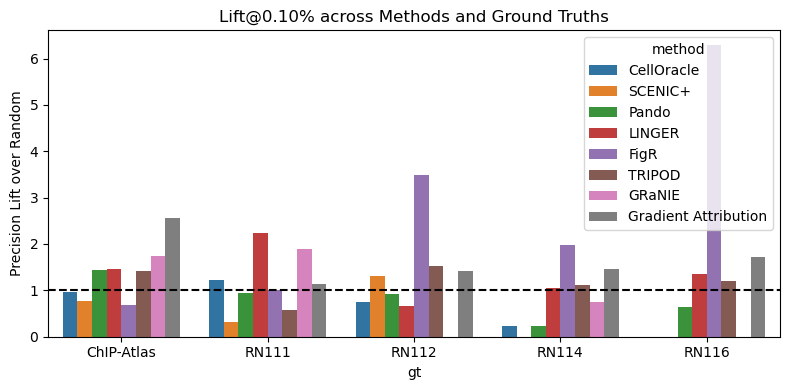

In [154]:
k = "Lift@0.10%"   # change to 0.5% / 1% as needed

plt.figure(figsize=(8, 4))
sns.barplot(
    data=results_df,
    x="gt",
    y=k,
    hue="method",
)
plt.axhline(1.0, color="black", linestyle="--")
plt.ylabel("Precision Lift over Random")
plt.title(f"{k} across Methods and Ground Truths")
plt.tight_layout()
plt.show()


In [ ]:
tf_auc_df = per_tf_auroc(grad_df, gt_edges)
tf_auc_df["AUROC"].describe()


count    19.000000
mean      0.704376
std       0.101092
min       0.506192
25%       0.666761
50%       0.695583
75%       0.749556
max       0.974936
Name: AUROC, dtype: float64

In [183]:
prec_df = per_tf_precision_at_k(grad_df, gt_edges, frac=0.01)

prec_df["lift"] = prec_df["Precision@1%"] / prec_df["pos_rate"]

prec_df["lift"].describe()


count    19.000000
mean      5.069720
std       5.658875
min       0.000000
25%       2.110975
50%       3.556820
75%       5.779695
max      25.090000
Name: lift, dtype: float64

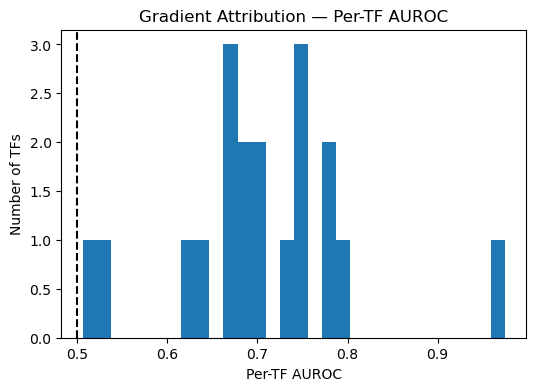

In [184]:
plt.figure(figsize=(6,4))
plt.hist(tf_auc_df["AUROC"], bins=30)
plt.axvline(0.5, color="k", linestyle="--")
plt.xlabel("Per-TF AUROC")
plt.ylabel("Number of TFs")
plt.title("Gradient Attribution — Per-TF AUROC")
plt.show()
